##6.5 Machine Learning: Part 2

###This script contains the following:
    ####1.  Import libraries and data and rename columns
    ####2. The elbow technique
    ####3. k-means clustering

###. Import libraries and data and rename columns

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [4]:
# This option ensures the graphs you create are displayed in your notebook without the need to \"call\" them specifically.\n",
%matplotlib inline

In [5]:
#import data file
df=pd.read_csv(r'C:\\Users\\chloe\\Documents\\05.2023 project\\02 Data\\Prepared data\\WorldAQI_Clean.csv', index_col = False)

In [6]:
df.shape

(16393, 15)

In [7]:
df.head()

,Unnamed: 0,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [10]:
#hiding from view categorical columns from the data as k-means algorithm can only handle numerical variables
df_nocat=df.drop(columns=['Country', 'City','AQI Category','CO AQI Category','Ozone AQI Category', 'NO2 AQI Category', 'PM2.5 AQI Category'])

In [13]:
df_nocat.head()

,Unnamed: 0,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,0,51,1,36,0,51,44.7444,44.2031
1,1,41,1,5,1,41,-5.2900,-44.4900
2,2,41,1,5,1,41,-11.2958,-41.9869
3,3,66,1,39,2,66,37.1667,15.1833
4,4,34,1,34,0,20,53.0167,20.8833


In [16]:
df_nocat.rename(columns = {'AQI Value' : 'AQI', 'CO AQI Value': 'CO AQI', 'Ozone AQI Value': 'Ozone AQI', 'NO2 AQI Value': 'NO2 AQI', 'PM2.5 AQI Value': 'PM2.5 AQI', 'lat' : 'Latitude', 'lng' : 'Longitude' }, inplace = True)

### 2. The elbow technique

In [17]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_nocat).score(df_nocat) for i in range(len(kmeans))] # Creates a score that represents a rate of variation for the given cluster option.
score

[-380987588689.0873,
 -95422700369.5663,
 -42513209841.70683,
 -24025129531.98281,
 -15434367487.760853,
 -10762958696.568096,
 -7941426867.341625,
 -6126714039.334153,
 -4866157724.824011]

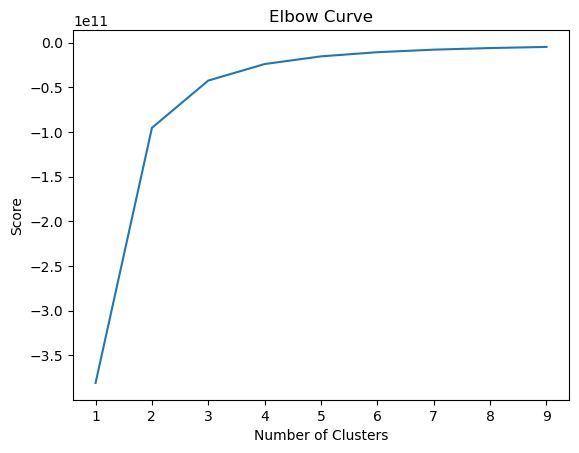

In [19]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score),
pl.xlabel('Number of Clusters'),
pl.ylabel('Score'),
pl.title('Elbow Curve'),
pl.show()

########  In this example, there's a large jump from two to three on the x-axis, and a lesser but still significant jump between three and four but after that, the curve straightens out. This means that the optimal count for these clusters is four.

### 3. k-means clustering

In [21]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4)

In [22]:
# Fit the k-means object to the data.
kmeans.fit(df_nocat)

KMeans(n_clusters=4)

In [25]:
df_nocat['clusters'] = kmeans.fit_predict(df_nocat)

In [26]:
df_nocat.head()

,Unnamed: 0,AQI,CO AQI,Ozone AQI,NO2 AQI,PM2.5 AQI,Latitude,Longitude,clusters
0,0,51,1,36,0,51,44.7444,44.2031,1
1,1,41,1,5,1,41,-5.2900,-44.4900,1
2,2,41,1,5,1,41,-11.2958,-41.9869,1
3,3,66,1,39,2,66,37.1667,15.1833,1
4,4,34,1,34,0,20,53.0167,20.8833,1


In [27]:
df_nocat['clusters'].value_counts()

0    4116
2    4106
3    4086
1    4085
Name: clusters, dtype: int64

#the clusters are of approimately equal size

AttributeError: 'tuple' object has no attribute 'grid'

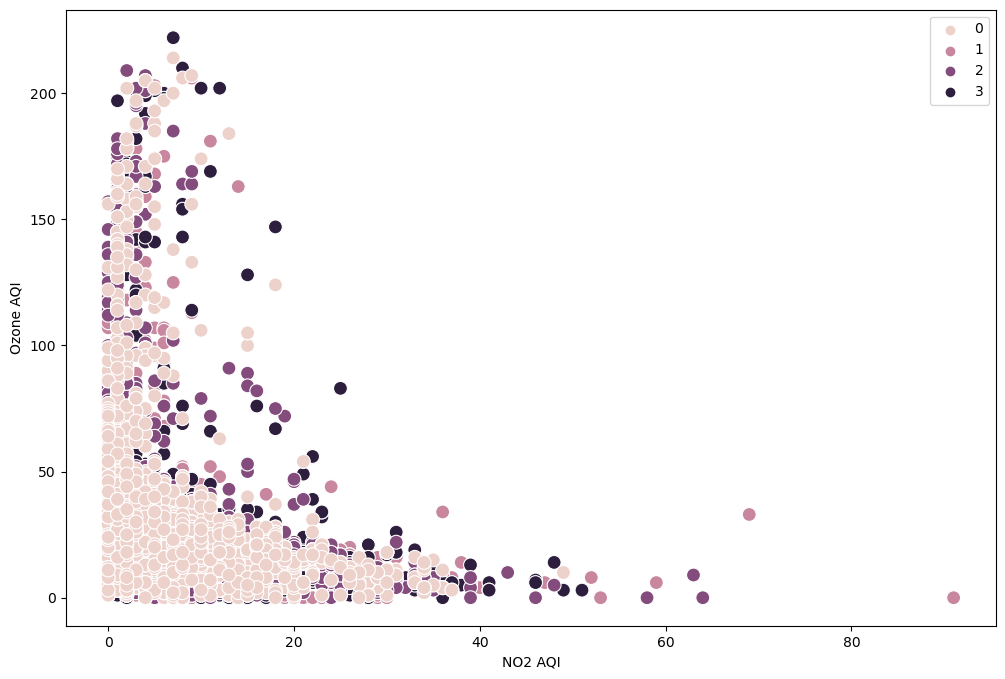

In [28]:
# Plot the clusters for the \"NO2 AQI\" and \"Ozone AQI\" variables.
plt.figure(figsize=(12,8)),
ax = sns.scatterplot(x=df_nocat['NO2 AQI'], y=df_nocat['Ozone AQI'], hue=kmeans.labels_, s=100),
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('NO2 AQI') # Label x-axis.
plt.ylabel('Ozone AQI') # Label y-axis.
plt.show()

##what are the results? The clusters are difficult to make sense of at first glance. '0' cluster shows that cities which have very high levels of Ozone AQI (200)have much lower levels of NO2 AQI (max 50). Cluster 1 indicates the extremes of NO2 levels and where they correlate on Ozone, and cluster 3 does this vice versa. The darkest cluster (3) appears to show some mid-rnages where both levels are similar, although this is less clear. THere is a lot of overlapping, which makes it difficult to judge.Perhaps three clusters would have been better)

AttributeError: 'tuple' object has no attribute 'grid'

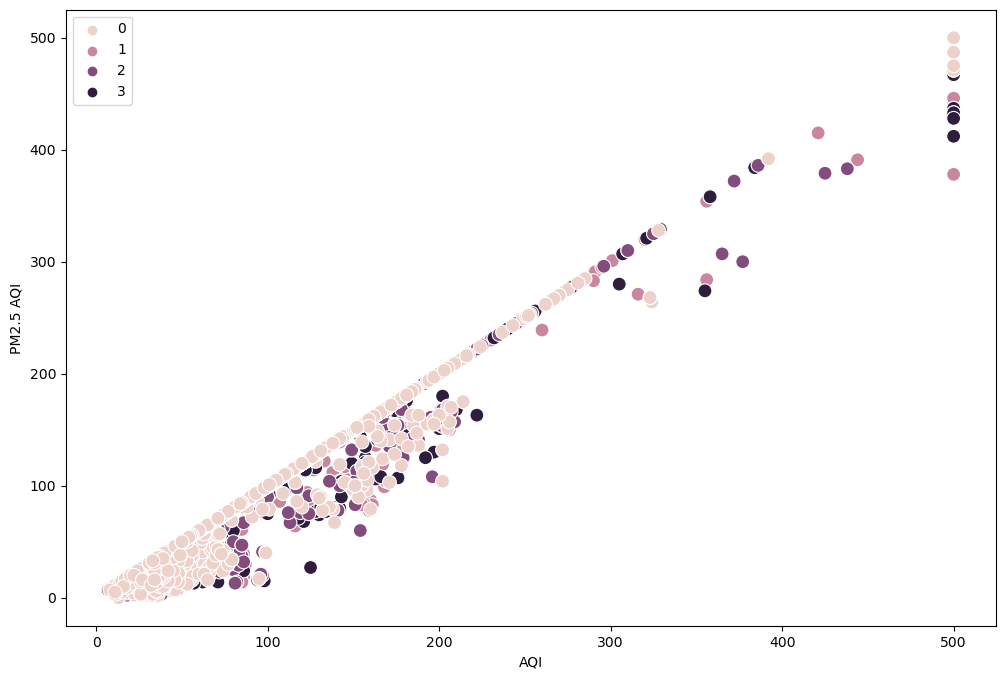

In [29]:
# Plot the clusters for the \"House Age\" and \"Price per Unit\" variables.
plt.figure(figsize=(12,8)),
ax = sns.scatterplot(x=df_nocat['AQI'], y=df_nocat['PM2.5 AQI'], hue=kmeans.labels_, s=100),
ax.grid(False),
plt.xlabel('AQI'),
plt.ylabel('PM2.5 AQI'),
plt.show()

#The results here are less clear to interpret. It is clear that there is a stronglinear relationship between PM2.5 and levels and overall air quality, but it is difficult to interpret what the different clusters represent.
#Most likely, this result indicates that clustering is not the most valuable tool for this particular comparison, since the relationship is already so strong. 

In [31]:
#using loc. to rename cluster names
df.loc[df_nocat['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df_nocat['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df_nocat['clusters'] == 0, 'cluster'] = 'pale pink'
df.loc[df_nocat['clusters'] == 3, 'cluster'] = 'dark purple'

In [32]:
df.groupby('cluster').agg({'AQI':['mean', 'median'],'CO AQI':['mean', 'median'],'NO2 AQI':['mean', 'median'], 'Ozone AQI':['mean', 'median'], 
        'PM2.5 AQI':['mean', 'median']})

AQI           CO AQI          NO2 AQI         Ozone AQI  \
                  mean median      mean median      mean median       mean   
cluster                                                                      
dark purple  64.109887   53.0  1.347283    1.0  3.949094    2.0  31.344347   
pale pink    62.436103   52.0  1.329932    1.0  3.837464    2.0  31.997085   
pink         63.294492   52.0  1.381885    1.0  3.947124    2.0  31.219829   
purple       63.077691   53.0  1.338529    1.0  3.671943    2.0  32.610813   

                    PM2.5 AQI         
            median       mean median  
cluster                               
dark purple   29.0  61.138522   53.0  
pale pink     29.0  59.117104   51.0  
pink          29.0  60.168666   52.0  
purple        30.0  59.885777   52.0

####thoughts and observations about these findings:
General air quality (AQI) is highest in the dark purple cluster, but there is no difference in clusters for CO AQI levels, NO2 or Ozone, indicating that none of these pollutants have a particularly strong impact on air quality. PM2.5 levels are particularly strong in the dark purple and pink clusters, which relate to the higher means of AQI (meaning worse) levels.  

#propose what these results could be useful for in future steps of an analytics pipeline
In future steps of an analytics pipeline, the correlations between clusters would need to be analysed further, but for the time being, future analysis can focus on those countries or cities where PM2.5 levels are highest, which could lead to futher research into the biggest emitters of PM2.5 and influencing policy direction.

In [33]:
#saving new file for posterity:
df_nocat.to_csv("C:/Users/chloe/Documents/05.2023 project/02 Data/Prepared Data/AQI_numerical.csv")